In [1]:
!pip install scikit-learn==1.1.3 -q
!pip install imblearn -q

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логическая-регрессия" data-toc-modified-id="Логическая-регрессия-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Логическая регрессия</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки:

* `RowNumber` — индекс строки в данных
* `CustomerId` — уникальный идентификатор клиента
* `Surname` — фамилия
* `CreditScore` — кредитный рейтинг
* `Geography` — страна проживания
* `Gender` — пол
* `Age` — возраст
* `Tenure` — сколько лет человек является клиентом банка
* `Balance` — баланс на счёте
* `NumOfProducts` — количество продуктов банка, используемых клиентом
* `HasCrCard` — наличие кредитной карты
* `IsActiveMembe` — активность клиента
* `EstimatedSalary` — предполагаемая зарплата

Целевой признак:
* `Exited` — факт ухода клиента

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV,
    GridSearchCV
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import (
    f1_score, 
    precision_score, 
    recall_score, 
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score, 
    roc_curve
)
from sklearn.utils import shuffle
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from ipywidgets import IntProgress

from IPython.display import display

from tqdm import tqdm_notebook as tqdm
from sklearn.dummy import DummyClassifier


RANDOM_STATE = 55555

## Подготовка данных

In [3]:
def get_data_info(data):
    display(data.sample(15))
    display(data.info())
    display(data.describe(include='all'))

In [4]:
data = pd.read_csv('C:/Users/nedel/Desktop/Projects/Churn.csv')
get_data_info(data)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5902,5903,15586504,Trevisani,694,France,Male,40,9.0,0.00,2,1,0,40463.03,0
4924,4925,15574868,Lowell,792,Germany,Male,36,NaN,115725.24,2,0,0,1871.25,0
9913,9914,15590177,Chiedozie,718,France,Female,44,1.0,133866.22,1,0,1,139049.24,0
4677,4678,15791780,Ts'ao,706,Germany,Female,48,10.0,104478.12,3,0,1,158248.71,1
1962,1963,15692416,Aikenhead,358,Spain,Female,52,8.0,143542.36,3,1,0,141959.11,1
4327,4328,15581811,Chukwubuikem,678,Germany,Female,30,1.0,139676.95,2,0,1,16146.00,0
9372,9373,15775826,Iadanza,677,France,Male,30,1.0,78133.15,1,0,1,174225.88,0
9529,9530,15661708,She,508,France,Female,41,NaN,0.00,2,1,1,94170.84,0
2758,2759,15668347,Ingram,624,France,Male,36,6.0,0.00,2,0,0,84635.64,0
1067,1068,15599131,Dilke,650,Germany,Male,26,4.0,214346.96,2,1,0,128815.33,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


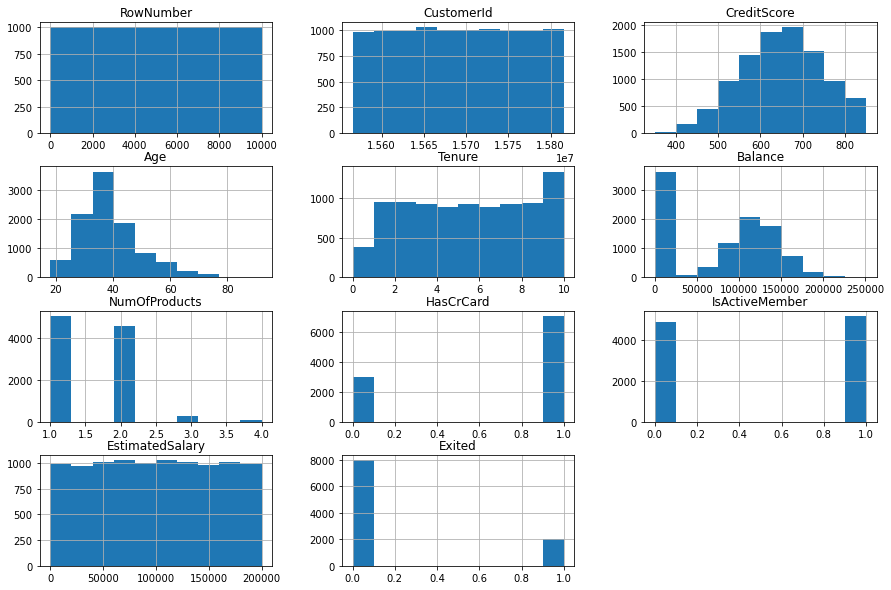

In [5]:
data.hist(figsize=(15,10));

In [6]:
data.corr()['Exited'].sort_values()

IsActiveMember    -0.156128
NumOfProducts     -0.047820
CreditScore       -0.027094
Tenure            -0.016761
RowNumber         -0.016571
HasCrCard         -0.007138
CustomerId        -0.006248
EstimatedSalary    0.012097
Balance            0.118533
Age                0.285323
Exited             1.000000
Name: Exited, dtype: float64

In [7]:
corr = data.corr()
corr.style.background_gradient(cmap='RdYlGn')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.007322,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.021418,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.007322,-0.021418,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520,-0.016761
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [8]:
data.loc[data['Tenure'] == data['Tenure'].isna()].head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
29,30,15656300,Lucciano,411,France,Male,29,0.0,59697.17,2,1,1,53483.21,0
35,36,15794171,Lombardo,475,France,Female,45,0.0,134264.04,1,1,0,27822.99,1
57,58,15647091,Endrizzi,725,Germany,Male,19,0.0,75888.20,1,0,0,45613.75,0
72,73,15812518,Palermo,657,Spain,Female,37,0.0,163607.18,1,0,1,44203.55,0
127,128,15782688,Piccio,625,Germany,Male,56,0.0,148507.24,1,1,0,46824.08,1


Пропуски в столбце `Tenure` скорее всего связаны с тем, что эти клиенты только недавно стали клиентами банка

Т.к. столбец `Tenure` содержит только целые цисла, приведем его к типу `Int64`

In [9]:
data.loc[data['Tenure'].isna(), 'Tenure'] = data['Tenure'].median()
data['Tenure'] = data['Tenure'].astype(int)
print('Пропусков в столбце Tenure: ', data['Tenure'].isna().sum())

Пропусков в столбце Tenure:  0


Приведем названия столбоцов к `snake_case`

In [10]:
data = data.rename(columns={'RowNumber': 'row_number',
                           'CustomerId': 'customer_id',
                           'Surname': 'surname',
                           'CreditScore': 'credit_score',
                           'Geography': 'geography',
                           'Gender': 'gender',
                           'Age': 'age',
                           'Tenure': 'tenure',
                           'Balance': 'balance',
                           'NumOfProducts': 'num_of_products',
                           'HasCrCard': 'has_cr_card',
                           'IsActiveMember': 'is_active_member',
                           'EstimatedSalary': 'estimated_salary',
                           'Exited': 'exited'})

Проверим на дубликаты

In [11]:
print('Явных дубликатов в данных -',data.duplicated().sum())

Явных дубликатов в данных - 0


Удалим столбцы которые не нужны для обучения модели

In [12]:
data = data.drop(columns=['row_number', 'customer_id', 'surname'])

Вывод:

Подготовили данные к исследованию: 
* Привели названия столбоцов к `snake_case`
* Заполнили пропуски медианой и изменили тип данных в столбце `tenure`
* Удалили данные, которые не пригодятся для обучения

## Исследование задачи

Разобъем данные по принципу `3:1:1`

In [13]:
target = data['exited']
features = data.drop('exited', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features,
                                                                              target, 
                                                                              test_size=0.4, 
                                                                              random_state=RANDOM_STATE)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid, 
                                                                            target_valid, 
                                                                            test_size=0.5, 
                                                                            random_state=RANDOM_STATE)

In [14]:
feature_names = features.columns.tolist() 
for column in feature_names: 
    print(column.upper())
    print(features[column].value_counts(dropna=False))
    print('------------------')

CREDIT_SCORE
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: credit_score, Length: 460, dtype: int64
------------------
GEOGRAPHY
France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64
------------------
GENDER
Male      5457
Female    4543
Name: gender, dtype: int64
------------------
AGE
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: age, Length: 70, dtype: int64
------------------
TENURE
5     1836
1      952
2      950
8      933
3      928
7      925
4      885
9      882
6      881
10     446
0      382
Name: tenure, dtype: int64
------------------
BALANCE
0.00         3617
130170.82       2
105473.74       2
85304.27        1
159397.75       1
             ... 
81556.89        1
112687.69       1
108698.96       1
238387.56       1
130142.79       1
Name: balance, Length: 6382, dtype: int64
------------------
N

In [15]:
print('features:')
print(f' train {features_train.shape}\n valid{features_valid.shape}\n test{features_test.shape}')
print('target')
print(f' train {target_train.shape}\n valid{target_valid.shape}\n test{target_test.shape}')

features:
 train (6000, 10)
 valid(2000, 10)
 test(2000, 10)
target
 train (6000,)
 valid(2000,)
 test(2000,)


Проверим баланс классов

In [16]:
target.value_counts(normalize = 1)

0    0.7963
1    0.2037
Name: exited, dtype: float64

Заметен дисбаланс классов классов примерно `4:1`, изучим модели без исправления баланса

In [17]:
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
ohe_features = features_train.select_dtypes(include='object').columns.to_list()
num_features = features_train.select_dtypes(exclude='object').columns.to_list()
num_features.remove('has_cr_card')
num_features.remove('is_active_member')

In [18]:
ohe.fit(features_train[ohe_features])

features_train[
    ohe.get_feature_names_out()
] = ohe.transform(features_train[ohe_features])

features_train = features_train.drop(ohe_features, axis=1)

scaler = StandardScaler()

features_train[num_features] = scaler.fit_transform(features_train[num_features])

features_train.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2569,-0.102710,0.097899,-1.098497,0.536042,-0.897394,1,0,1.035987,1.0,0.0,0.0
5450,1.578534,-0.567540,0.352862,-1.228183,0.799003,1,0,0.272952,0.0,0.0,1.0
4485,1.038876,-0.472477,1.441381,0.510826,0.799003,1,1,-1.259792,1.0,0.0,1.0
6214,-2.001893,-0.377415,1.441381,1.124089,0.799003,1,1,-1.668531,1.0,0.0,1.0
9912,0.519973,-0.472477,0.352862,0.502286,-0.897394,1,1,0.336943,0.0,1.0,0.0


In [19]:
features_valid[
    ohe.get_feature_names_out()
] = ohe.transform(features_valid[ohe_features])

features_valid = features_valid.drop(ohe_features, axis=1)

features_valid[num_features] = scaler.transform(
    features_valid[num_features]
)
features_valid.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
9743,1.049254,-0.662603,1.441381,0.624196,0.799003,0,1,0.030714,1.0,0.0,1.0
4461,1.018120,-1.042853,-0.735658,-1.228183,-0.897394,1,0,-1.669702,0.0,1.0,0.0
5983,-0.331027,-1.042853,0.352862,0.360817,0.799003,1,0,-0.889885,1.0,0.0,0.0
8829,0.333168,0.097899,-1.461337,-1.228183,0.799003,0,0,-0.417720,0.0,0.0,0.0
1448,-0.995222,0.668275,-0.372818,0.701208,-0.897394,1,0,1.346532,1.0,0.0,0.0


In [20]:
features_test[
    ohe.get_feature_names_out()
] = ohe.transform(features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

features_test[num_features] = scaler.transform(
    features_test[num_features]
)
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
2214,2.066303,-1.232979,-0.372818,-0.224794,0.799003,0,1,1.375001,0.0,0.0,0.0
1334,-1.680174,-1.042853,-1.461337,0.045241,0.799003,1,1,1.177886,1.0,0.0,1.0
7304,0.291656,1.809027,1.078541,0.788669,0.799003,1,1,-0.223119,1.0,0.0,1.0
6900,0.239766,0.192961,-0.009978,0.800763,-0.897394,1,1,1.155759,0.0,1.0,0.0
884,-1.410344,2.474465,0.715701,0.248009,-0.897394,1,1,0.737933,0.0,0.0,1.0


### Дерево решений

In [21]:
features_train_dt = features_train.copy()
target_train_dt = target_train.copy()

In [22]:
%%time

model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)


param_dist_dt = {
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4)
}


rs = RandomizedSearchCV(
    model_dt, 
    param_dist_dt, 
    n_iter = 200, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE
)

rs.fit(features_train_dt, target_train_dt)
print('Лучшие параметры:', rs.best_params_)
print('F1:', rs.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Лучшие параметры: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7}
F1: 0.5815491746339224
CPU times: total: 891 ms
Wall time: 4.98 s


Лучшие параметры:
* min_samples_split: `2`
* min_samples_leaf: `4`
* max_depth: `7`

F1: `0.58`

### Случайный лес

In [23]:
features_train_rf = features_train.copy()
target_train_rf = target_train.copy()

In [24]:
model_rf =  RandomForestClassifier(random_state=RANDOM_STATE)

param_dist_rf = {
    'n_estimators': range(10, 350, 10),
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4)
}

rs = RandomizedSearchCV(
    model_rf, 
    param_dist_rf, 
    n_iter = 500, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE
)

rs.fit(features_train_rf, target_train_rf)
print('Лучшие параметры:', rs.best_params_)
print('F1', rs.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 190, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 12}
F1 0.5947209895710112


Лучшие параметры:
* n_estimators: `190`
* min_samples_split: `3` 
* min_samples_leaf: `2` 
* max_depth: `12`

F1: `0.59`

### Логическая регрессия 

In [25]:
features_train_lr = features_train.copy()
target_train_lr = target_train.copy()

In [26]:
%%time

model = LogisticRegression(random_state=RANDOM_STATE, solver='lbfgs', max_iter=1000)
model.fit(features_train_lr, target_train_lr)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.3171641791044776
CPU times: total: 0 ns
Wall time: 15 ms


Применем лучшие гипепараметры и посмотрим результат

In [27]:
def table():
    table = pd.DataFrame(
        {'Метрика': ['Accuracy', 'Precision', 'Recall', 'F1'],
         'Значение': [accuracy_score(target_valid, predicted_valid),
                      precision_score(target_valid, predicted_valid),
                      recall_score(target_valid, predicted_valid),
                      f1_score(target_valid, predicted_valid)],
        } 
    )
    display(table)

In [28]:
%%time

model_dt = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    min_samples_split=2,
    min_samples_leaf=4, 
    max_depth=7
)

model_dt.fit(features_train_dt, target_train_dt)
predicted_valid = model_dt.predict(features_valid)

print('Решающее дерево')
table()

Решающее дерево


,Метрика,Значение
0,Accuracy,0.850000
1,Precision,0.673611
2,Recall,0.485000
3,F1,0.563953


CPU times: total: 31.2 ms
Wall time: 26 ms


In [29]:
%%time

model_rf = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=190,
    min_samples_split=3,
    min_samples_leaf=2,
    max_depth=12,
)

model_rf.fit(features_train_rf, target_train_rf)
predicted_valid = model_rf.predict(features_valid)

print('Случайный лес')
table()

Случайный лес


,Метрика,Значение
0,Accuracy,0.861000
1,Precision,0.742063
2,Recall,0.467500
3,F1,0.573620


CPU times: total: 1.14 s
Wall time: 1.16 s


In [30]:
%%time

model_lr = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='lbfgs'
)

model_lr.fit(features_train_lr, target_train_lr)
predicted_valid = model_lr.predict(features_valid)

print('Логистическая регрессия')
table()

Логистическая регрессия


,Метрика,Значение
0,Accuracy,0.817000
1,Precision,0.625000
2,Recall,0.212500
3,F1,0.317164


CPU times: total: 31.2 ms
Wall time: 21 ms


AUC-ROC DecisionTreeClassifier: 0.8341125
AUC-ROC RandomForestClassifier: 0.855046875
AUC-ROC LogisticRegression: 0.7701171875


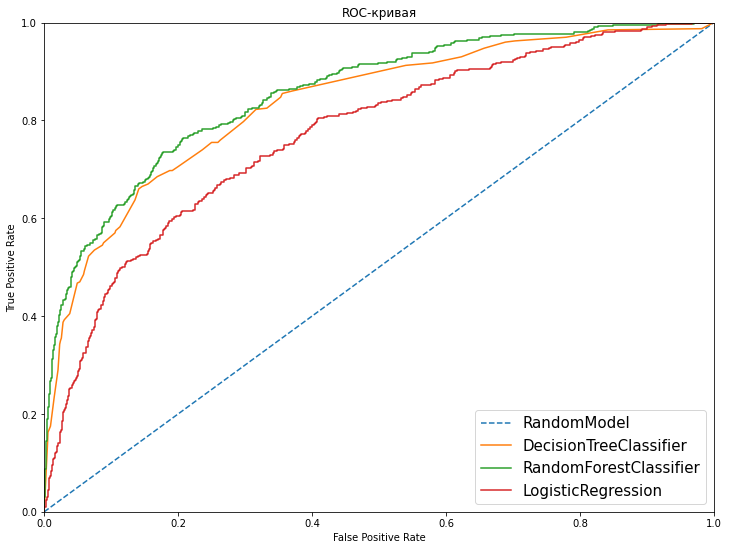

По результатам видно, что лучшей моделью является `cлучайный лес`

Вывод:

В данных заметен дисбаланс классов классов примерно `4:1`

Лучший результат без борьбы с дисбалансом у `cлучайного леса`, он обходит остальные модели по всем метрикам

Худший результат у `логистической регрессии`

Решающее дерево
* Accuracy: `0.85`
* Precision: `0.67`
* Recall: `0.48`
* F1: `0.56`
* AUC-ROC DecisionTreeClassifier: `0.83`

Случайный лес
* Accuracy: `0.86`
* Precision: `0.74`
* Recall: `0.46`
* F1: `0.57`
* AUC-ROC RandomForestClassifier: `0.85`

Логистическая регрессия
* Accuracy: `0.81`
* Precision: `0.62`
* Recall: `0.21`
* F1: `0.31`
* AUC-ROC LogisticRegression: `0.77`

## Борьба с дисбалансом

Попробуем исправить баланс 3 спосабами 
* `Взвешивание классов`
* `Увеличение выборки` 
* `Уменьшение выборки`

И проверим изменятся ли значения метрик

### Взвешивание классов

Сделаем классы сбалансироваными указав гиперпараметр `class_weight='balanced'

#### Дерево решений

In [32]:
%%time

model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)


param_dist_dt = {
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4),
    'class_weight': ['balanced']
}


rs = RandomizedSearchCV(
    model_dt, 
    param_dist_dt, 
    n_iter = 200, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE
)

rs.fit(features_train_dt, target_train_dt)
print('Лучшие параметры:', rs.best_params_)
print('F1:', rs.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Лучшие параметры: {'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 7, 'class_weight': 'balanced'}
F1: 0.5818796839005045
CPU times: total: 578 ms
Wall time: 1.02 s


Лучшие параметры:
* 'min_samples_split': `3`
* 'min_samples_leaf': `3`
* 'max_depth': `7`
* 'class_weight': `'balanced'`

F1: `0.58`

#### Случайный лес

In [33]:
%%time

model_rf =  RandomForestClassifier(random_state=RANDOM_STATE)

param_dist_rf = {
    'n_estimators': range(10, 350, 10),
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4),
    'class_weight': ['balanced']
}

rs = RandomizedSearchCV(
    model_rf, 
    param_dist_rf, 
    n_iter = 500, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE,
)

rs.fit(features_train_rf, target_train_rf)
print('Лучшие параметры:', rs.best_params_)
print('F1', rs.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 230, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_depth': 8, 'class_weight': 'balanced'}
F1 0.6349997427160907
CPU times: total: 4.42 s
Wall time: 1min 37s


Лучшие параметры:
* 'n_estimators': `230`
* 'min_samples_split': `3`
* 'min_samples_leaf': `3`
* 'max_depth': `8`
* 'class_weight': `'balanced'`

F1: `0.63`

#### Логистическая регрессия

In [34]:
%%time

model =  LogisticRegression(
    random_state=RANDOM_STATE, 
    solver='lbfgs', 
    max_iter=1000, 
    class_weight='balanced'
)
model.fit(features_train_lr, target_train_lr)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.492091388400703
CPU times: total: 0 ns
Wall time: 10 ms


Применем лучшие гипепараметры и посмотрим результат

In [35]:
%%time

model_dt_b = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    min_samples_split=3,
    min_samples_leaf=3,
    max_depth=7,
    class_weight='balanced'
)

model_dt_b.fit(features_train_dt, target_train_dt)
predicted_valid = model_dt_b.predict(features_valid)

print('Решающее дерево')
table()

Решающее дерево


,Метрика,Значение
0,Accuracy,0.791500
1,Precision,0.484848
2,Recall,0.680000
3,F1,0.566077


CPU times: total: 15.6 ms
Wall time: 22 ms


In [36]:
%%time

model_rf_b = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=230,
    min_samples_split=3,
    min_samples_leaf=3,
    max_depth=8,
    class_weight='balanced'

)

model_rf_b.fit(features_train_rf, target_train_rf)
predicted_valid = model_rf_b.predict(features_valid)

print('Случайный лес')
table()

Случайный лес


,Метрика,Значение
0,Accuracy,0.823000
1,Precision,0.548729
2,Recall,0.647500
3,F1,0.594037


CPU times: total: 938 ms
Wall time: 973 ms


In [37]:
%%time

model_lr_b = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='lbfgs',
    max_iter=1000,
    class_weight='balanced'
)

model_lr_b.fit(features_train_lr, target_train_lr)
predicted_valid = model_lr_b.predict(features_valid)

print('Логистическая регрессия')
table()

Логистическая регрессия


,Метрика,Значение
0,Accuracy,0.711000
1,Precision,0.379404
2,Recall,0.700000
3,F1,0.492091


CPU times: total: 31.2 ms
Wall time: 17 ms


AUC-ROC DecisionTreeClassifier: 0.81896953125
AUC-ROC RandomForestClassifier: 0.856490625
AUC-ROC LogisticRegression: 0.7732453125


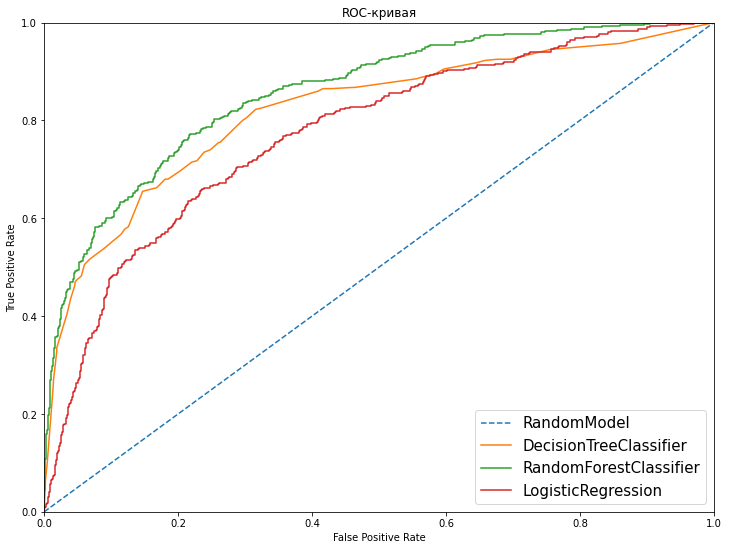

In [38]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

probabilities_valid = model_dt_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier:',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

probabilities_valid = model_rf_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier:',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

probabilities_valid = model_lr_b.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression:',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='15')

plt.title("ROC-кривая")
plt.show()

`Взвешивание классов`

Решающее дерево:
* Accuracy	`0.79`
* Precision	`0.48`
* Recall	`0.68`
* F1	`0.56`

Случайный лес:
* Accuracy	`0.82`
* Precision	`0.54`
* Recall	`0.64`
* F1	`0.59`


Логистическая регрессия:
* Accuracy	`0.71`
* Precision	`0.37`
* Recall	`0.70`
* F1	`0.49`


Показатель F1 логистической регрессии заметно вырос, остальные же модели показали результат хуже

### Увеличение выборки

In [39]:
oversample = SMOTE(random_state=RANDOM_STATE)
features_train_up, target_train_up = oversample.fit_resample(features_train, target_train)
print(target_train_up.value_counts(normalize = 1))

0    0.5
1    0.5
Name: exited, dtype: float64


#### Дерево решений

In [40]:
%%time

model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)


param_dist_dt = {
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4),
}


rs = RandomizedSearchCV(
    model_dt, 
    param_dist_dt, 
    n_iter = 200, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE
)

rs.fit(features_train_up, target_train_up)
print('Лучшие параметры:', rs.best_params_)
print('F1:', rs.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Лучшие параметры: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 17}
F1: 0.8165639700814965
CPU times: total: 672 ms
Wall time: 1.57 s


Лучшие параметры:
* 'min_samples_split': `2`
* 'min_samples_leaf': `1`
* 'max_depth': `15`

F1: `0.81`

#### Случайный лес

In [41]:
%%time

model_rf =  RandomForestClassifier(random_state=RANDOM_STATE)

param_dist_rf = {
    'n_estimators': range(10, 350, 10),
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4)
}

rs = RandomizedSearchCV(
    model_rf, 
    param_dist_rf, 
    n_iter = 500, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE,
)

rs.fit(features_train_up, target_train_up)
print('Лучшие параметры:', rs.best_params_)
print('F1', rs.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 310, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 17}
F1 0.900419886037572
CPU times: total: 7.77 s
Wall time: 2min 22s


Лучшие параметры:
* 'n_estimators': `310`
* 'min_samples_split': `2`
* 'min_samples_leaf': `1`
* 'max_depth': `17`

F1: `0.90`

#### Логистическая регрессия

In [42]:
%%time

model =  LogisticRegression(
    random_state=RANDOM_STATE, 
    solver='lbfgs', 
    max_iter=1000, 
)

model.fit(features_train_up, target_train_up)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.48244824482448245
CPU times: total: 15.6 ms
Wall time: 18 ms


Применем лучшие гипепараметры и посмотрим результат

In [43]:
%%time

model_dt_up = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=15,
)

model_dt_up.fit(features_train_up, target_train_up)
predicted_valid = model_dt_up.predict(features_valid)

print('Решающее дерево')
table()

Решающее дерево


,Метрика,Значение
0,Accuracy,0.795000
1,Precision,0.489362
2,Recall,0.575000
3,F1,0.528736


CPU times: total: 62.5 ms
Wall time: 49.2 ms


In [44]:
%%time

model_rf_up = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=310,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=17,

)

model_rf_up.fit(features_train_up, target_train_up)
predicted_valid = model_rf_up.predict(features_valid)

print('Случайный лес')
table()

Случайный лес


,Метрика,Значение
0,Accuracy,0.851000
1,Precision,0.638587
2,Recall,0.587500
3,F1,0.611979


CPU times: total: 3.09 s
Wall time: 3.1 s


In [45]:
%%time

model_lr_up = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='lbfgs',
    max_iter=1000,
)

model_lr_up.fit(features_train_up, target_train_up)
predicted_valid = model_lr_up.predict(features_valid)

print('Логистическая регрессия')
table()

Логистическая регрессия


,Метрика,Значение
0,Accuracy,0.712500
1,Precision,0.376934
2,Recall,0.670000
3,F1,0.482448


CPU times: total: 31.2 ms
Wall time: 19 ms


AUC-ROC DecisionTreeClassifier: 0.7236734375
AUC-ROC RandomForestClassifier: 0.8535312499999999
AUC-ROC LogisticRegression: 0.7627453125


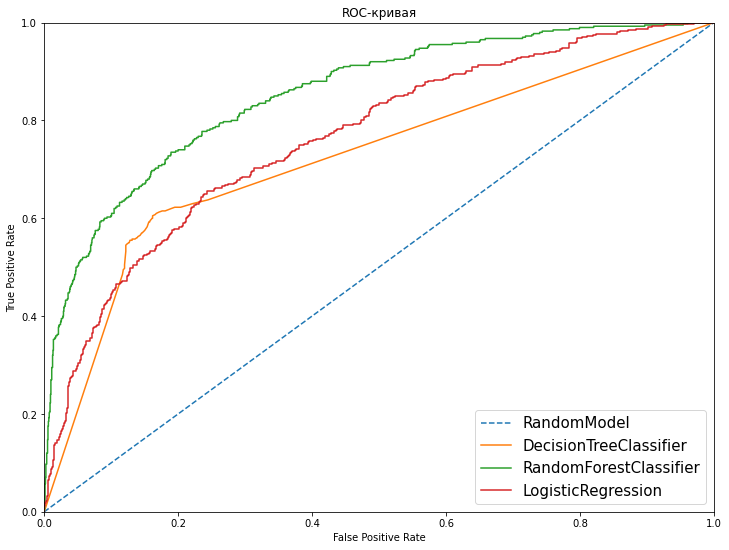

In [46]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

probabilities_valid = model_dt_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier:',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

probabilities_valid = model_rf_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier:',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

probabilities_valid = model_lr_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression:',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='15')

plt.title("ROC-кривая")
plt.show()

`Увеличение выборки`

Решающее дерево

*	Accuracy	`0.79`
*	Precision	`0.48`
*	Recall	`0.59`
*	F1	`0.52`
* AUC-ROC DecisionTreeClassifier: `0.73`

Случайный лес

*	Accuracy	`0.85`
*	Precision	`0.63`
*	Recall	`0.58`
*	F1	`0.61`
* AUC-ROC RandomForestClassifier: `0.85`

Логистическая регрессия

*	Accuracy	`0.71`
*	Precision	`0.37`
*	Recall	`0.67`
*	F1	`0.48`
* AUC-ROC LogisticRegression: `0.76`

F1 мера выросла у случайного леса и логистической регресии, а у Решающего дерева упала.

### Уменьшение выборки

In [47]:
undersample = RandomUnderSampler(random_state=RANDOM_STATE)
features_train_down, target_train_down = undersample.fit_resample(features_train, target_train)
print(target_train_down.value_counts(normalize = 1))

0    0.5
1    0.5
Name: exited, dtype: float64


In [48]:
%%time

model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)


param_dist_dt = {
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4),
}


rs = RandomizedSearchCV(
    model_dt, 
    param_dist_dt, 
    n_iter = 200, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE
)

rs.fit(features_train_down, target_train_down)
print('Лучшие параметры:', rs.best_params_)
print('F1:', rs.best_score_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Лучшие параметры: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 6}
F1: 0.7657067192550517
CPU times: total: 500 ms
Wall time: 637 ms


Лучшие параметры:
* 'min_samples_split': `4`
* 'min_samples_leaf': `2`
* 'max_depth': `6`

F1: `0.76`

#### Случайный лес

In [49]:
%%time

model_rf =  RandomForestClassifier(random_state=RANDOM_STATE)

param_dist_rf = {
    'n_estimators': range(10, 350, 10),
    'max_depth': range(2, 20),
    'min_samples_split': (2, 3, 4),
    'min_samples_leaf': (1, 2, 3, 4)
}

rs = RandomizedSearchCV(
    model_rf, 
    param_dist_rf, 
    n_iter = 500, 
    cv = 3, 
    verbose = 3,
    scoring='f1',
    n_jobs=-1, 
    random_state=RANDOM_STATE,
)

rs.fit(features_train_down, target_train_down)
print('Лучшие параметры:', rs.best_params_)
print('F1', rs.best_score_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Лучшие параметры: {'n_estimators': 40, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_depth': 18}
F1 0.780053857291709
CPU times: total: 3.17 s
Wall time: 53.4 s


Лучшие параметры:
* 'n_estimators': `40`
* 'min_samples_split': `2`
* 'min_samples_leaf': `3`
* 'max_depth': `18`

F1: `0.78`

#### Логистическая регрессия

In [50]:
%%time

model =  LogisticRegression(
    random_state=RANDOM_STATE, 
    solver='lbfgs', 
    max_iter=1000, 
)

model.fit(features_train_down, target_train_down)
predicted_valid = model.predict(features_valid)
print('F1:', f1_score(target_valid, predicted_valid))

F1: 0.4866785079928952
CPU times: total: 15.6 ms
Wall time: 10 ms


Применем лучшие гипепараметры и посмотрим результат

In [51]:
%%time

model_dt_down = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    min_samples_split=4,
    min_samples_leaf=2,
    max_depth=6,
)

model_dt_down.fit(features_train_down, target_train_down)
predicted_valid = model_dt_down.predict(features_valid)

print('Решающее дерево')
table()

Решающее дерево


,Метрика,Значение
0,Accuracy,0.76150
1,Precision,0.43937
2,Recall,0.69750
3,F1,0.53913


CPU times: total: 15.6 ms
Wall time: 13 ms


In [52]:
%%time

model_rf_down = RandomForestClassifier(
    random_state=RANDOM_STATE,
    n_estimators=40,
    min_samples_split=3,
    min_samples_leaf=2,
    max_depth=18,

)

model_rf_down.fit(features_train_down, target_train_down)
predicted_valid = model_rf_down.predict(features_valid)

print('Случайный лес')
table()

Случайный лес


,Метрика,Значение
0,Accuracy,0.788500
1,Precision,0.480737
2,Recall,0.717500
3,F1,0.575727


CPU times: total: 125 ms
Wall time: 135 ms


In [53]:
%%time

model_lr_down = LogisticRegression(
    random_state=RANDOM_STATE,
    solver='lbfgs',
    max_iter=1000,
)

model_lr_down.fit(features_train_down, target_train_down)
predicted_valid = model_lr_down.predict(features_valid)

print('Логистическая регрессия')
table()

Логистическая регрессия


,Метрика,Значение
0,Accuracy,0.711000
1,Precision,0.377410
2,Recall,0.685000
3,F1,0.486679


CPU times: total: 15.6 ms
Wall time: 16 ms


AUC-ROC DecisionTreeClassifier: 0.81339453125
AUC-ROC RandomForestClassifier: 0.8512265625000001
AUC-ROC LogisticRegression: 0.7724484375


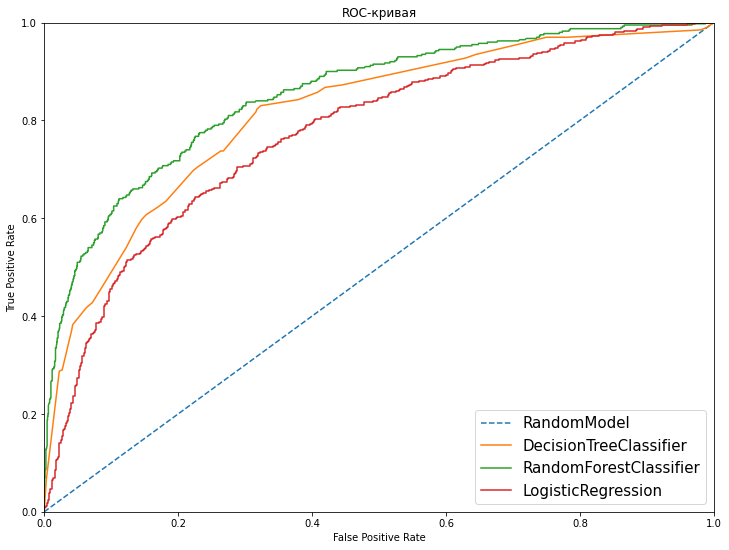

In [54]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

probabilities_valid = model_dt_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC DecisionTreeClassifier:',auc_roc)
plt.plot(fpr, tpr, label='DecisionTreeClassifier')

probabilities_valid = model_rf_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC RandomForestClassifier:',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

probabilities_valid = model_lr_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC LogisticRegression:',auc_roc)
plt.plot(fpr, tpr, label='LogisticRegression')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='15')

plt.title("ROC-кривая")
plt.show()

`Уменьшение выборки`

Решающее дерево

*	Accuracy	`0.76`
*	Precision	`0.43`
*	Recall	`0.69`
*	F1	`0.53`
* AUC-ROC DecisionTreeClassifier: `0.81`

Случайный лес

*	Accuracy	`0.78`
*	Precision	`0.48`
*	Recall	`0.71`
*	F1	`0.57`
* AUC-ROC RandomForestClassifier: `0.85`

Логистическая регрессия

*	Accuracy	`0.71`
*	Precision	`0.37`
*	Recall	`0.68`
*	F1	`0.48`
* AUC-ROC LogisticRegression: `0.77`

Показатель F1 логистической регрессии заметно вырос, остальные же модели показали результат хуже

Вывод:

Заметно получилось увеличить показатели метрик у `логической регрессии` во всех способах борьбы с дисбалансом, а лучший результат получился у `случайного леса` с `увеличением выборки`. 

Но для тестовой модели выберем `случайный лес` со `взвешиванием классов`, т.к. этот способ показал отличную скорость `31.2 ms` против `2.84 s` у спопосба с увеличением выборки

## Тестирование модели

Объеденим тренировочную и валидационную выборки перед тестированием модели

In [55]:
features_full = pd.concat([features_train, features_valid], axis=0, ignore_index=True)
target_full = pd.concat([target_train, target_valid], axis=0, ignore_index=True)

print(features_full.shape)
print(target_full.shape)

(8000, 11)
(8000,)


In [56]:
model_rf_b.fit(features_full, target_full)
predicted_test = model_rf_b.predict(features_test)
print('Accuracy:', accuracy_score(target_test, predicted_test))
print('Precision:', precision_score(target_test, predicted_test))
print('Recall:', recall_score(target_test, predicted_test))
print('F1:', f1_score(target_test, predicted_test))


Accuracy: 0.822
Precision: 0.5487077534791253
Recall: 0.6814814814814815
F1: 0.6079295154185022


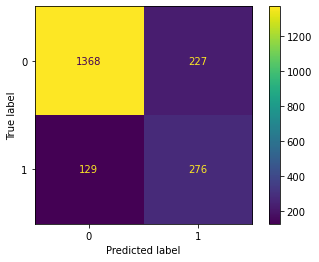

In [57]:
cm = confusion_matrix(target_test, predicted_test)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=model_rf_b.classes_
)
disp.plot()

plt.show()

AUC-ROC: 0.8538875343473042


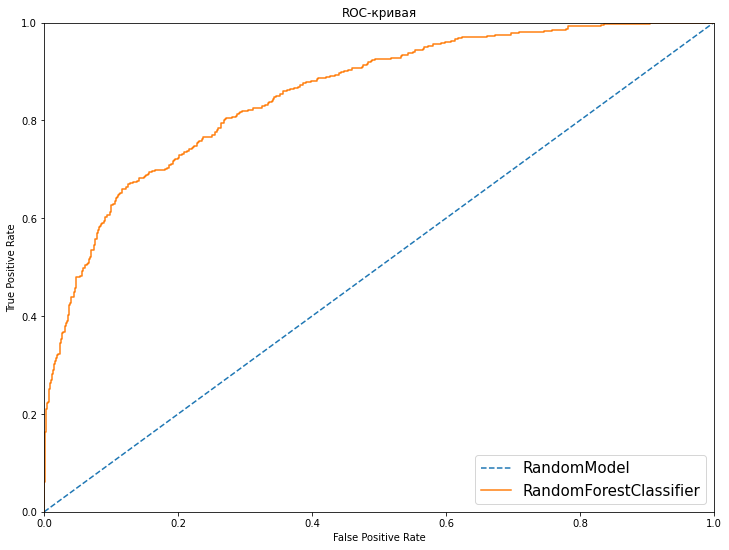

In [58]:
plt.figure(figsize=[12,9])

plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')

probabilities_test = model_rf_b.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print('AUC-ROC:',auc_roc)
plt.plot(fpr, tpr, label='RandomForestClassifier')

plt.xlim([0,1])
plt.ylim([0,1])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc='lower right', fontsize='15')

plt.title("ROC-кривая")
plt.show()

Итоговый вывод:

При работе с проектом данные подготовили к обучению, разбили их на `тренировочную`, `валидационную` и `тестовую` выборку в пропорции `3:1:1`, провели иследование с 3 моделями (`решающее дерево`, `случайный лес` и `логическая регрессия`), лучший резултат показала модель `случайный лес`. В данных был дисбаланс в пропорции `4:1`, который был решен 3 способами (`взвешивание классов`, `увеличение выборки`, `уменьшение выборки`), лучший результат показал способ с `взвешиванием классов`. Далее протестировали модель на тестовой выборке и получили результаты метрик:

* `Accuracy`: 0.82
* `Precision`: 0.54
* `Recall`: 0.68
* `F1`: 0.60
* `AUC-ROC`: 0.85

`Recall` показывает, что в 68% положительных случаев модель правильно их классифицирует

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*